40


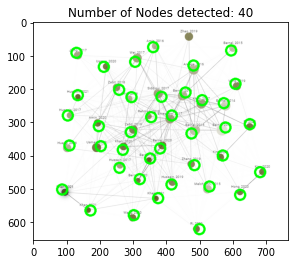

In [17]:
from skimage import data
from skimage import transform
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.lines as mlines





# Reading the input image
img = cv2.imread('graph.png')
 
# convert to grayscale
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


imager=cv2.imread('graph.png',0)
size1=2
gauss_kernel = np.ones((size1,size1),np.float32)/(size1*size1)
imager = cv2.filter2D(imager,-1,gauss_kernel)

size2=3
dil_kernel = np.ones((size2,size2), np.uint8)
img_dilation = cv2.dilate(img, dil_kernel, iterations=2)


# cv2.imshow('Input', img)
# cv2.imshow('Dilation', img_dilation)
 
# cv2.waitKey(0)



img_pre= cv2.cvtColor(img_dilation, cv2.COLOR_BGR2GRAY)
for i in range(img_pre.shape[0]):
    for j in range(img_pre.shape[1]):
        if img_pre[i,j]<=230:
            img_pre[i,j]=0

size1=2
gauss_kernel = np.ones((size1,size1),np.float32)/(size1*size1)
imager = cv2.filter2D(img_pre,-1,gauss_kernel)

size2=2
ero_kernel = np.ones((size2,size2), np.uint8)
img_ero = cv2.erode(imager , ero_kernel, iterations=1)


img1=img_ero

# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img1,None)

#---------------------Filtering of Keypoints-------------------
thresholder=31
keypointer=[]
for indie in range(len(kp)):
    if indie==0:
        keypointer.append(kp[indie])
    else:
        x=kp[indie].pt[0]
        y=kp[indie].pt[1]
        test_len=0
        for p in range(len(keypointer)):
            xp=keypointer[p].pt[0]
            yp=keypointer[p].pt[1]
            
            dist=((x-xp)**2+(y-yp)**2)**0.5
            
            if (dist>=thresholder):
                test_len+=1
            
        if test_len==len(keypointer):
            keypointer.append(kp[indie])

                
                
print(len(keypointer))  
#-----------------------------------------------------------------------

def drawKeyPts(im,keyp,col,th):
    for curKey in keyp:
        x=np.int(curKey.pt[0])
        y=np.int(curKey.pt[1])
        size = 15
        cv2.circle(im,(x,y),size, col,thickness=th, lineType=8, shift=0) 
    plt.imshow(im)    
    return im 

fig1 = plt.gcf()
imWithCircles = drawKeyPts(img,keypointer,(0,255,0),5)
# show the image
plt.imshow(imWithCircles)
plt.title("Number of Nodes detected: "+str(len(keypointer)))
plt.show()
fig1.savefig('graph_nodes_detected.jpg',dpi=1000, bbox_inches='tight')
